In [1]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, Variable, JITParticle, AdvectionRK4, plotTrajectoriesFile
import numpy as np
import math
from datetime import timedelta
from operator import attrgetter

In [2]:
fieldset = FieldSet.from_parcels("parcels_examples/MovingEddies_data/moving_eddies")

OSError: FieldSet files not found: parcels_examples/MovingEddies_data/moving_eddiesU.nc

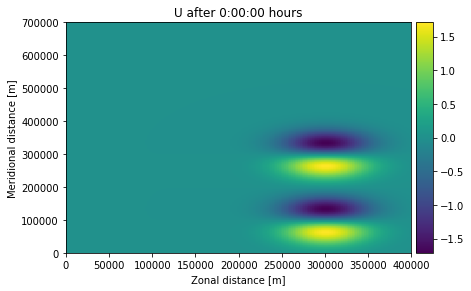

In [5]:
fieldset.U.show()

In [6]:
pset = ParticleSet.from_list(fieldset=fieldset,   # the fields on which the particles are advected
                             pclass=JITParticle,  # the type of particles (JITParticle or ScipyParticle)
                             lon=[3.3e5,  3.3e5], # a vector of release longitudes 
                             lat=[1e5, 2.8e5])    # a vector of release latitudes

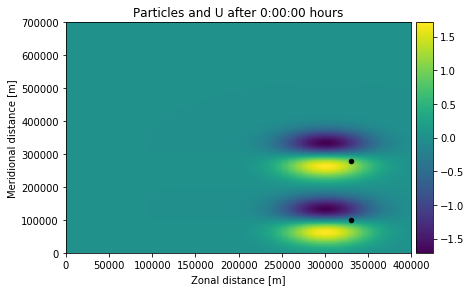

In [7]:
pset.show(field=fieldset.U)


In [8]:
pset.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
             runtime=timedelta(days=6),    # the total length of the run
             dt=timedelta(minutes=5),      # the timestep of the kernel
             output_file=pset.ParticleFile(name="EddyParticles.nc", outputdt=timedelta(hours=1)))  # the file name and the time step of the outputs

INFO: Compiled JITParticleAdvectionRK4 ==> /tmp/parcels-1000/9c477bdb0085ce7d29bdee29fa28c7c6.so


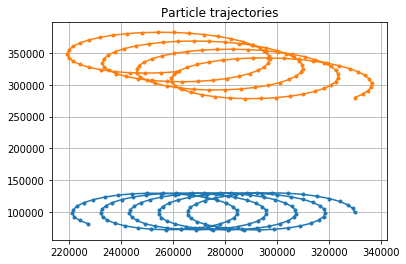

In [9]:
plotTrajectoriesFile('EddyParticles.nc')

In [13]:
plotTrajectoriesFile('EddyParticles.nc', mode='movie2d_notebook')

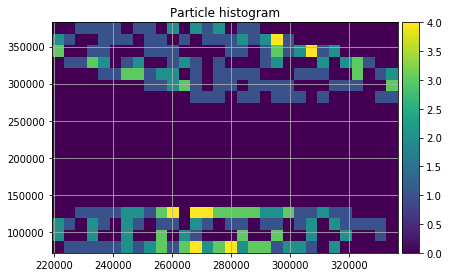

In [14]:
plotTrajectoriesFile('EddyParticles.nc', mode='hist2d', bins=[30, 20]);
